# Task 1 

In [7]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_digits
import numpy as np

digits = load_digits()

In [8]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


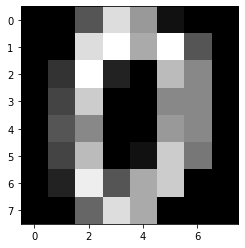

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(digits.images[0])
plt.show()

In [10]:
digits.target[0]

0

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [12]:
models = [KNeighborsClassifier(), LinearDiscriminantAnalysis(), SVC(), LogisticRegression()]
model_names = ['KNeighborsClassifier', 'LinearDiscriminantAnalysis', 'SVC', 'LogisticRegression']
for i in range(len(models)):
    m = models[i]
    m.fit(X_train, y_train) 

    pred = m.predict(X_test)

    acc = accuracy_score(y_test, pred)
    print( model_names[i], "Accuracy :", np.round(acc, 2))

KNeighborsClassifier Accuracy : 0.99
LinearDiscriminantAnalysis Accuracy : 0.94
SVC Accuracy : 0.47
LogisticRegression Accuracy : 0.96


# Task 2

In [13]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jan 24 08:48:51 2019

@author: hehu
"""

import numpy as np
from math import floor, ceil

def bilinear(image, r, c):
    minr = floor(r)
    minc = floor(c)
    maxr = ceil(r)
    maxc = ceil(c)

    dr = r-minr
    dc = c-minc

    top = (1-dc)*image[minr,minc] + dc*image[minr,maxc]
    bot = (1-dc)*image[maxr,minc] + dc*image[maxr,maxc]

    return (1-dr)*top+dr*bot

def local_binary_pattern(image, P=8, R=1):
    rr = - R * np.sin(2*np.pi*np.arange(P, dtype=np.double) / P)
    cc = R * np.cos(2*np.pi*np.arange(P, dtype=np.double) / P)
    rp = np.round(rr, 5)
    cp = np.round(cc, 5)
    
    rows = image.shape[0]
    cols = image.shape[1]

    output = np.zeros((rows, cols))

    for r in range(R,rows-R):
        for c in range(R,cols-R):
            lbp = 0
            for i in range(P):
                if bilinear(image, r+rp[i], c+cp[i]) - image[r,c] >= 0:
                    lbp += 1<<i
                            
            output[r,c] = lbp

    return output


import glob
import numpy as np
import os
import matplotlib.pyplot as plt
#from simplelbp import local_binary_pattern

def load_data(folder):
    """ 
    Load all images from subdirectories of
    'folder'. The subdirectory name indicates
    the class.
    """
    
    X = []          # Images go here
    y = []          # Class labels go here
    classes = []    # All class names go here
    
    subdirectories = glob.glob(folder + "/*")
    
    # Loop over all folders
    for d in subdirectories:
        
        # Find all files from this folder
        files = glob.glob(d + os.sep + "*.jpg")
        
        # Load all files
        for name in files:
            
            # Load image and parse class name
            img = plt.imread(name)
            class_name = name.split(os.sep)[-2]

            # Convert class names to integer indices:
            if class_name not in classes:
                classes.append(class_name)
            
            class_idx = classes.index(class_name)
            
            X.append(img)
            y.append(class_idx)
    
    # Convert python lists to contiguous numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    return X, y

def extract_lbp_features(X, P = 8, R = 5):
    """
    Extract LBP features from all input samples.
    - R is radius parameter
    - P is the number of angles for LBP
    """
    
    F = [] # Features are stored here
    
    N = X.shape[0]
    for k in range(N):
        
        #print("Processing image {}/{}".format(k+1, N))
        
        image = X[k, ...]
        lbp = local_binary_pattern(image, P, R)
        hist = np.histogram(lbp, bins=range(257))[0]
        F.append(hist)

    return np.array(F)

# Test our loader

X, y = load_data("Ex3_data/GTSRB_subset")
F = extract_lbp_features(X)
print("X shape: " + str(X.shape))
print("F shape: " + str(F.shape))

# Continue your code here...


X shape: (202, 64, 64)
F shape: (202, 256)


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
X = extract_lbp_features(X, P = 8, R = 5)
X, y = shuffle(X, y, random_state=0)

In [15]:
for i in range(len(models)):
    m = models[i]
    scores = cross_val_score(m, X, y, cv = 5)

    print( model_names[i], "CrossVal Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

KNeighborsClassifier CrossVal Accuracy: 0.97 (+/- 0.07)
LinearDiscriminantAnalysis CrossVal Accuracy: 0.99 (+/- 0.02)
SVC CrossVal Accuracy: 0.54 (+/- 0.06)
LogisticRegression CrossVal Accuracy: 1.00 (+/- 0.00)


# Task 3 

In [16]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
ensembels = [RandomForestClassifier(n_estimators = 100), 
            ExtraTreesClassifier(n_estimators = 100),
            AdaBoostClassifier(n_estimators = 100),
            GradientBoostingClassifier(n_estimators = 100)]

ens_names = ['RandomForestClassifier', 
            'ExtraTreesClassifier',
            'AdaBoostClassifier',
            'GradientBoostingClassifier']

for i in range(len(ensembels)):
    ens = ensembels[i]
    ens.fit(X_train, y_train)
    
    pred = ens.predict(X_test)

    acc = accuracy_score(y_test, pred)
    print( ens_names[i], "Accuracy:", np.round(acc, 2))

RandomForestClassifier Accuracy: 0.97
ExtraTreesClassifier Accuracy: 0.98
AdaBoostClassifier Accuracy: 1.0
GradientBoostingClassifier Accuracy: 0.9
